#  <span style="color:black">２値分類のチュートリアル - 初心者向け</span>

**Created using:** PyCaret 3.0.0rc6 <br />
**Date Updated:** January 25, 2023

# チュートリアルの目的
初心者向けの２値分類のチュートリアルへようこそ。 このチュートリアルは、PyCaretが未経験の人を前提に作成されています。

このチュートリアルでは、次のことを学びます。

* **PyCaret のインストール:** PyCaretのインストール方法
* **はじめに:** ２値分類の紹介
* **データの取得:** PyCaretのデータセットリポジトリに含まれるサンプルデータを取得する方法
* **セットアップ:** PyCaretでの実験を初期化する方法
* **モデルの作成:** 交差検証を使用したモデルをトレーニングする方法
* **モデルの調整:** モデルのハイパーパラメーターを自動で調整する方法
* **モデルのプロット:** 描画機能を使用してモデルのパフォーマンスを分析する方法
* **モデルの完成:** 実験の最後に最適なモデルを完成させる方法
* **モデルの予測:** 新しいデータや未知のデータを予測する方法
* **モデルの保存:** 今後の使用のためにモデルを保存する方法
* **モデルの読み込み:** 保存したモデルをファイルから読み込む方法

**読了時間:** 約45分 <br />
**実行時間:** <5 分


# PyCaret をインストール
pip を使用して pycaret をインストールできます。

`pip install pycaret` <br />

すべての依存関係を含むフル バージョンをインストールするには、次を使用します。 <br />

`pip install pycaret[full]`


＃関連チュートリアル：
- [２値分類チュートリアル - 中級レベル](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)
- [２値分類チュートリアル - エキスパート レベル](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)

# 二値分類とは？
二値分類は教師あり機械学習の手法の一つで、合格/不合格、陽性/陰性、デフォルト/非デフォルトなど、順序のない離散的なクラスラベルの予測を目的としています。以下に、分類の実際の使用例をいくつか示します。

- 患者がある病気に罹患しているかどうかを判定する医療検査 - 分類特性は病気の有無です。
- 工場における「合格・不合格」のテスト方法や品質管理。つまり、ある仕様が満たされているか満たされていないかの判断 - 通過/非通過の分類。
- 情報検索のおいて、記事を検索結果に含めるかどうかを決定します。分類特性は、記事の関連性、またはユーザーにとっての有用性になります。

[二値分類についてより詳しく](https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d)

# データセット

このチュートリアルでは、UCIのデータセットである **Default of Credit Card Clients Dataset** を使用します。このデータセットには、2005年4月から2005年9月までの台湾のクレジットカード顧客の支払いの未納、人口統計学的要因、信用データ、支払い履歴、請求書に関する情報が含まれています。サンプル数は24,000、特徴量は25です。各カラムの簡単な説明は以下の通りです。

- **ID**: 各顧客のID
- **LIMIT_BAL**: 与信額（単位：台湾ドル）（個人、家族・補填を含む。
- **SEX**: 性別 (1=男性、2=女性)
- **学歴**: (1=大学院、2=大学、3=高校、4=その他、5=不明、6=未定)
- **結婚歴**： 結婚の有無（1=既婚、2=独身、3=その他）。
- **AGE**: 年齢
- **PAY_1～PAY_6**： nヶ月前の返済状況 (PAY_1 = 先月 ... PAY_6 = 6ヶ月前) (ラベル: -1=正常に支払う, 1=1ヶ月の支払い遅延, 2=2ヶ月の支払い遅延, ...。8=8ヶ月の支払い遅延, 9=9ヶ月以上の支払い遅延)
- **BILL_AMT1〜BILL_AMT6**: nヶ月前の請求明細の金額 ( BILL_AMT1 = last_month ... BILL_AMT6 = 6ヶ月前)
- **PAY_AMT1 to PAY_AMT6**: nヵ月前の支払額 ( BILL_AMT1 = last_month ... BILL_AMT6 = 6 ヵ月前 )
- **default**: デフォルトの支払額 (1=yes, 0=no) `目的編数`.

# データセットへの謝辞:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

元のデータセットとその説明は[こちら](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)で確認できます。

# データの取得

`credit`データセットは`datasets`モジュールの`get_data`関数を使用して読みこむことができます。  
[Source](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [3]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
#check the shape of data
dataset.shape

(24000, 24)

pycaretのpredict関数を後ほど試すために、データセットから5%のサンプルを取っておきます。

In [5]:
# split data into 95% and 5%
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# Setupの初期化

`setup` 関数は、PyCaretの実験を初期化し、変換処理のパイプラインを関数へ渡されるすべてのパラメーターに基づいて作成します。 setup関数は、他の関数を実行する前に呼び出す必要があります。 `data` と `target` の 2つの必須パラメータを取り、それ以外のパラメーターは任意です。

In [6]:
from pycaret.classification import *

In [7]:
exp_clf101 = setup(data = data, target = 'default', session_id = 123) 

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


セットアップが正常に実行されると、実験の情報が表形式で表示されます。

- **Session id**: 再現性の確保のためにすべての関数へ渡される疑似乱数のシード値。 `session_id` が渡されない場合は、自動的に生成された乱数がすべての関数に渡されます。<br/>
<br/>
- **Target type**: ２値または多クラス分類。 目的タイプは自動的に検出されます。 <br/>
<br/>
- **Label Encoding**: 目的変数が 1 または 0 ではなく文字列型 (例えば、「はい」または「いいえ」) の場合、ラベルを 1 と 0 に自動的に変換し、割り当てを参考までに表示します (0 : いいえ、 1 : はい) 。 このチュートリアルでは、ターゲット変数が数値型であるため、ラベルのエンコードは必要ありません。 <br/>
<br/>
- **Original data shape**: 変換前の元のデータの形状。 <br/>
<br/>
- **Transformed train set shape**: 変換後の訓練データの形状 <br/>
<br/>
- **Transformed test set shape**: 変換後のテストデータの形状 <br/>
<br/>
- **Numeric features**: 数値として扱われる特徴量の数。 このチュートリアルでは、すべての特徴量が数値変数として扱われます。 <br/>
<br/>
- **Categorical features**: カテゴリ変数として扱われる特徴量の数。 このチュートリアルでは該当の特徴はありません。 <br/>

# モデルの比較

`compare_models` 関数は、モデルライブラリで利用可能な全ての推論アルゴリズムで訓練と性能評価をクロスバリデーションを用いて行います。この関数の出力は、クロスバリデーションの平均スコアを表形式で表示します。

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8225,0.7890,0.3756,0.6791,0.4834,0.3868,0.4117,4.9430
lightgbm,Light Gradient Boosting Machine,0.8202,0.7842,0.3816,0.6630,0.4842,0.3848,0.4064,0.4990
ada,Ada Boost Classifier,0.8200,0.7802,0.3476,0.6847,0.4604,0.3660,0.3966,1.0450
rf,Random Forest Classifier,0.8193,0.7748,0.3870,0.6552,0.4864,0.3855,0.4053,3.2360
lda,Linear Discriminant Analysis,0.8151,0.7212,0.2739,0.7152,0.3958,0.3114,0.3618,0.0980
et,Extra Trees Classifier,0.8130,0.7677,0.3793,0.6277,0.4728,0.3674,0.3847,1.7260
ridge,Ridge Classifier,0.8007,0.0000,0.1558,0.7328,0.2567,0.1943,0.2735,0.0800
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0420
lr,Logistic Regression,0.7786,0.6400,0.0000,0.0000,0.0000,-0.0004,-0.0032,1.1820
knn,K Neighbors Classifier,0.7505,0.6100,0.1799,0.3694,0.2418,0.1133,0.1239,2.6160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [9]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# モデル作成

`create_model` 関数は，指定した推論アルゴリズムの性能評価をクロスバリデーションを用いて行います．この関数の出力は，CVスコアを含むフォールド毎の結果を表形式で表示します．利用可能なモデルは，関数 `models` を用いて確認できます.

In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
# train a decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7356,0.6274,0.4334,0.4080,0.4203,0.2493,0.2495
1,0.7237,0.6158,0.4193,0.3854,0.4016,0.2224,0.2227
2,0.7444,0.6514,0.4816,0.4304,0.4545,0.2883,0.2891
3,0.7199,0.6094,0.4079,0.3770,0.3918,0.2103,0.2106
4,0.7419,0.6233,0.4108,0.4155,0.4131,0.2477,0.2477
5,0.7299,0.6248,0.4363,0.3990,0.4168,0.2415,0.2419
6,0.7174,0.6015,0.3938,0.3697,0.3813,0.1985,0.1986
7,0.7325,0.6213,0.4221,0.4005,0.4110,0.2381,0.2382
8,0.7268,0.6147,0.4136,0.3893,0.4011,0.2244,0.2245


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [13]:
# train a k nearest neighbor model
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7412,0.5894,0.1671,0.3315,0.2222,0.0868,0.0941
1,0.7350,0.5767,0.1473,0.2989,0.1973,0.0601,0.0655
2,0.7632,0.6671,0.2096,0.4277,0.2814,0.1590,0.1735
3,0.7481,0.5990,0.1530,0.3439,0.2118,0.0875,0.0977
4,0.7531,0.6086,0.1983,0.3867,0.2622,0.1320,0.1427
5,0.7619,0.6214,0.1898,0.4161,0.2607,0.1418,0.1574
6,0.7419,0.5895,0.1671,0.3333,0.2226,0.0879,0.0954
7,0.7594,0.6133,0.1898,0.4061,0.2587,0.1371,0.1513
8,0.7475,0.6091,0.1898,0.3641,0.2495,0.1155,0.1243


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
# train a random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8227,0.7717,0.4108,0.6591,0.5061,0.4051,0.4219
1,0.8271,0.7726,0.4023,0.6860,0.5071,0.4108,0.4323
2,0.8233,0.8079,0.4108,0.6621,0.5070,0.4065,0.4237
3,0.8120,0.7501,0.3711,0.6268,0.4662,0.3611,0.3794
4,0.8139,0.7623,0.3541,0.6443,0.4570,0.3560,0.3793
5,0.8221,0.7827,0.3909,0.6667,0.4929,0.3937,0.4144
6,0.8120,0.7607,0.3711,0.6268,0.4662,0.3611,0.3794
7,0.8258,0.7959,0.4023,0.6794,0.5053,0.4079,0.4286
8,0.8208,0.7602,0.3739,0.6701,0.4800,0.3821,0.4058


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ここでの平均スコアは `compare_models` 関数の出力と一致します。これは、 `compare_models` のスコアの表に出力される指標値が、CVの全てのフォールドの平均スコアであるためです。

# モデルの調整

`tune_model` 関数は事前に定義したグリッドを用いて、モデルのハイパーパラメータを自動でチューニングします。この関数の出力は表形式で表示され、クロスバリデーションによるフォールドごとのスコアでる。最適なモデルは `optimize` パラメータで定義された指標に基づいて選択されます。カスタム探索グリッドを使用するには、 `custom_grid` パラメータを渡す必要があります。デフォルトの検索方法は `randomgridsearch` であり、チューニングにより必ずパフォーマンスが向上する保証はありません。パフォーマンスが改善されない場合は、 `n_iter` パラメータを大きくしてみることが考えられます。

In [15]:
# tune decision tree model
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8264,0.6573,0.3541,0.7184,0.4744,0.3845,0.4191
1,0.8271,0.6527,0.3399,0.7362,0.4651,0.3782,0.4185
2,0.8221,0.6515,0.3456,0.6971,0.4621,0.3697,0.4024
3,0.8170,0.6432,0.3314,0.6763,0.4449,0.3503,0.3823
4,0.8239,0.6486,0.3343,0.7195,0.4565,0.3678,0.4063
5,0.8252,0.6474,0.3286,0.7342,0.4540,0.3675,0.4097
6,0.8189,0.6434,0.3286,0.6905,0.4453,0.3530,0.3878
7,0.8283,0.6494,0.3286,0.7582,0.4585,0.3749,0.4213
8,0.8233,0.6503,0.3399,0.7101,0.4598,0.3695,0.4054


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [16]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [17]:
# tune knn model
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7794,0.6342,0.0595,0.5122,0.1066,0.0635,0.1139
1,0.7826,0.6624,0.0453,0.6154,0.0844,0.0558,0.1222
2,0.7832,0.7013,0.0623,0.5946,0.1128,0.0740,0.1386
3,0.7801,0.6399,0.0510,0.5294,0.0930,0.0563,0.1096
4,0.7794,0.6404,0.0482,0.5152,0.0881,0.0522,0.1029
5,0.7820,0.6774,0.0595,0.5676,0.1077,0.0686,0.1286
6,0.7857,0.6404,0.0567,0.6897,0.1047,0.0736,0.1536
7,0.7788,0.6633,0.0623,0.5000,0.1108,0.0650,0.1131
8,0.7732,0.6275,0.0340,0.3636,0.0622,0.0253,0.0499


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


デフォルトでは `tune_model` は `Accuracy` に基づき最適化しますが、`optimize` パラメータで変更ができます。例えば、 `tune_model(dt, optimize = 'AUC')` は、最も`AUC`が大きくなる決定木分類器のハイパーパラメータを探索します。

In [19]:
# tune random forest model (this may take some time)
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7682,0.7853,0.6317,0.4816,0.5466,0.3946,0.4012
1,0.7638,0.7883,0.6431,0.4749,0.5463,0.3915,0.3997
2,0.7870,0.8120,0.6884,0.5137,0.5884,0.4487,0.4575
3,0.7588,0.7668,0.5864,0.4641,0.5181,0.3602,0.3645
4,0.7801,0.7766,0.5949,0.5024,0.5447,0.4011,0.4036
5,0.7757,0.7910,0.6374,0.4945,0.5569,0.4099,0.4159
6,0.7531,0.7490,0.6006,0.4559,0.5183,0.3565,0.3626
7,0.7726,0.7828,0.6374,0.4891,0.5535,0.4044,0.4108
8,0.7519,0.7568,0.6062,0.4544,0.5194,0.3568,0.3635


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# モデル結果の描画

`plot_mdoel` 関数は、テスト/ホールドアウトのデータにおける学習済みモデルのパフォーマンスを分析します。場合によっては、モデルの再トレーニングが必要になるかもしれません。利用可能な描画タイプは 15 種類以上あります。利用可能な描画タイプの一覧は `plot_model` docstring を参照してください。

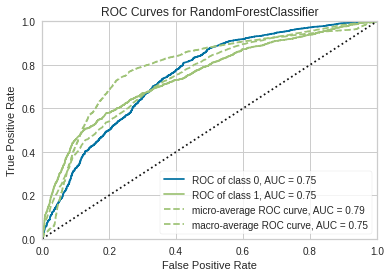

In [20]:
# auc plot
plot_model(tuned_rf, plot = 'auc')

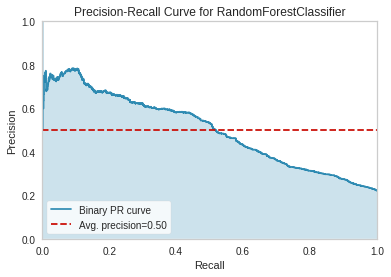

In [21]:
# precision recall curve plot
plot_model(tuned_rf, plot = 'pr')

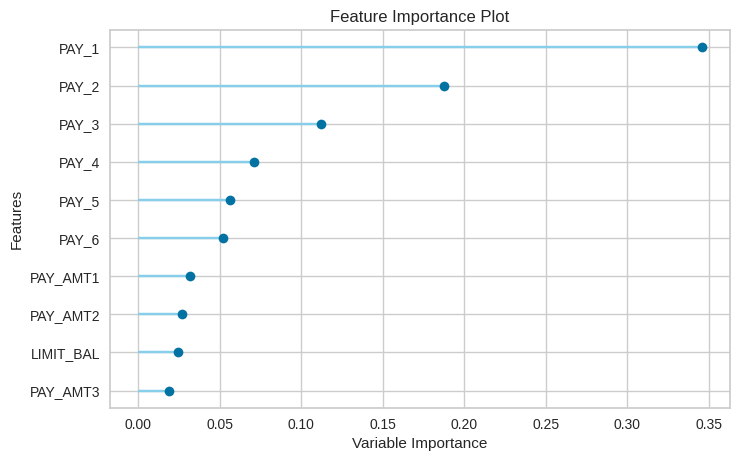

In [22]:
# feature importance plot
plot_model(tuned_rf, plot='feature')

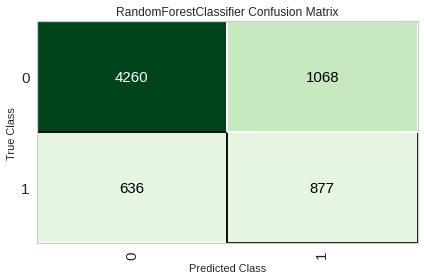

In [23]:
plot_model(tuned_rf, plot = 'confusion_matrix')

モデルのパフォーマンスを分析するもう一つの方法は、与えられたモデルに対して利用可能な全ての描画をユーザーインターフェースで表示できる `evaluate_model` 関数を使用することです。これは、Jupyterと互換性のあるノートブック環境を使用している場合にのみ利用可能です。

In [24]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# テスト／ホールドアウトサンプルの予測

pycaret の `predict_model` 関数は、与えられた学習済みモデルに対するラベルを生成します。 `data` が None の場合、テスト/ホールドアウトのデータに対して `prediction_label` と `prediction_score` を生成し、性能指標も表示します。

In [25]:
pred_holdout = predict_model(tuned_rf)
pred_holdout.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7509,0.7483,0.5796,0.4509,0.5072,0.3440,0.3489


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
15959,30000.0,1.0,1.0,1.0,38.0,8.0,7.0,6.0,5.0,4.0,...,31085.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8522
15960,110000.0,1.0,3.0,1.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,31073.0,390.0,5050.0,63032.0,1100.0,1100.0,1000.0,0,0,0.6116
15961,290000.0,2.0,1.0,2.0,27.0,2.0,0.0,0.0,0.0,2.0,...,278260.0,16500.0,15000.0,20000.0,10000.0,9701.0,0.0,0,1,0.7464
15962,110000.0,2.0,3.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,63208.0,4000.0,5000.0,3000.0,3000.0,3000.0,8954.0,0,0,0.7321
15963,360000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,235916.0,15000.0,9221.0,9225.0,8112.0,8369.0,9000.0,0,0,0.6824


# モデルの決定

`finalize_model` 関数は、テスト/ホールドアウトサンプル (このチュートリアルでは 30%) を含む完全なデータセットに対してパイプライン全体をフィットさせます。この関数の目的は、本番環境に導入する前に、完全なデータセットでモデルを学習させることです。

In [26]:
final_rf = finalize_model(tuned_rf)

In [27]:
print(final_rf)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    tr...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
               

# 未知データの予測

`predict_model`関数もまた、未知のデータセットに対する予測で使用されます。

In [28]:
# 5% sample witheld in the beginning
data_unseen.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
3,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
4,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0


In [29]:
# drop the default column from data_unseen
data_unseen.drop('default', axis = 1, inplace = True)

In [30]:
pred_unseen = predict_model(final_rf, data=data_unseen)
pred_unseen.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prediction_label,prediction_score
0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0.5623
1,380000.0,1.0,2.0,2.0,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0.7345
2,200000.0,2.0,2.0,1.0,32.0,-1.0,-1.0,-1.0,-1.0,2.0,...,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0.5606
3,200000.0,1.0,1.0,1.0,53.0,2.0,2.0,2.0,2.0,2.0,...,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0.8407
4,240000.0,1.0,1.0,2.0,41.0,1.0,-1.0,-1.0,0.0,0.0,...,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,1,0.5078


入力データセットには `prediction_label` と `prediction_score` というカラムが追加されます。`prediction_label` はラベル予測で、 `prediction_score` は **予測されたクラス** の確率になります。

# モデルの保存

`save_model` 関数は、パイプライン (モデルを含む) を `pkl` ファイルとしてディスクに保存するために使用します。

In [31]:
save_model(final_rf,'rf_final_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     tr...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',


# モデルの読み込み

`load_model` 関数は、パイプラインの `pkl` ファイルをディスクから読み込みます。

In [32]:
rf_pipeline_from_disk = load_model('rf_final_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [33]:
new_prediction = predict_model(rf_pipeline_from_disk, data=data_unseen)
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prediction_label,prediction_score
0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0.5623
1,380000.0,1.0,2.0,2.0,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0.7345
2,200000.0,2.0,2.0,1.0,32.0,-1.0,-1.0,-1.0,-1.0,2.0,...,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0.5606
3,200000.0,1.0,1.0,1.0,53.0,2.0,2.0,2.0,2.0,2.0,...,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0.8407
4,240000.0,1.0,1.0,2.0,41.0,1.0,-1.0,-1.0,0.0,0.0,...,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,1,0.5078


`unseen_predictions` と `new_prediction` の結果が同じであることに注意してください。

# Wrap-up / Next Steps?

このチュートリアルでは、データの読み込みから、前処理、モデルの学習、ハイパーパラメータの調整、予測、モデルの保存まで、機械学習パイプライン全体を扱いました。これらのステップは10個以下のコマンドで完了します。これらのコマンドは `create_model`, `tune_model`, `compare_models` のように自然な形で構成されており、非常に直感的で、覚えやすいよう仕様になっています。PyCaretを用いずに同様な実験を再構成すると、100行を簡単に超えるコード量が必要になるはずです。

ここでは、`pycaret.classification`の基本的な部分のみを取り上げました。次のチュートリアルでは、高度な前処理、アンサンブル、一般化スタッキング、そして機械学習パイプラインを完全にカスタマイズすることができる、データサイエンティストなら必ず知っておくべきその他のテクニックに深く踏み込んでいきます。

See you at the next tutorial. Follow the link to [Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)